# Thématique 3 - Analyse bivariée entre variables qualitatives

### Importation des librairies

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data pre-processing

In [3]:
# Préparation du fichier de données
filepath = "../data"
filename = "lenses.txt"
file = os.path.join(filepath, filename)

# Lecture des données
df_original = pd.read_csv(file, sep="\t")
df = df_original.copy()

# Affichage des indicateurs de positions et de dispersions
df.describe()

,Age,Prescription,Astigmatic,Tears,Recommendation
count,24,24,24,24,24
unique,3,2,2,2,3
top,young,myope,no,reduced,none
freq,8,12,12,12,15


Ce jeu de données comptabilise certaines caractéristiques dont l'âge, les prescriotiptions et des recommendations médicales pour les patients d'une clinique. Ici, nous comptons 24 patients, soit 24 individus. Les variables étant qualitatives, il est impossible d'obtenir des statistiques comme la moyenne ou le min/max. Il faudra donc adapter les données pour obtenir un tableau de contingence afin de faire une étude d'indépendance.

In [4]:
df.head()

,Age,Prescription,Astigmatic,Tears,Recommendation
0,young,myope,no,reduced,none
1,young,myope,no,normal,soft
2,young,myope,yes,reduced,none
3,young,myope,yes,normal,hard
4,young,hypermetrope,no,reduced,none


In [5]:
df.tail()

,Age,Prescription,Astigmatic,Tears,Recommendation
19,presbyopic,myope,yes,normal,hard
20,presbyopic,hypermetrope,no,reduced,none
21,presbyopic,hypermetrope,no,normal,soft
22,presbyopic,hypermetrope,yes,reduced,none
23,presbyopic,hypermetrope,yes,normal,none


In [6]:
df.shape

(24, 5)

Il y a 24 individus pour 5 caractéristiques/variables.

In [7]:
df.dtypes

Age               object
Prescription      object
Astigmatic        object
Tears             object
Recommendation    object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             24 non-null     object
 1   Prescription    24 non-null     object
 2   Astigmatic      24 non-null     object
 3   Tears           24 non-null     object
 4   Recommendation  24 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB


In [9]:
# Changement de type
df.Age = df["Age"].astype("category")
df.Prescription = df["Prescription"].astype("category")
df.Astigmatic = df["Astigmatic"].astype("category")
df.Tears = df["Tears"].astype("category")
df.Recommendation = df["Recommendation"].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             24 non-null     category
 1   Prescription    24 non-null     category
 2   Astigmatic      24 non-null     category
 3   Tears           24 non-null     category
 4   Recommendation  24 non-null     category
dtypes: category(5)
memory usage: 884.0 bytes


In [10]:
df.columns

Index(['Age', 'Prescription', 'Astigmatic', 'Tears', 'Recommendation'], dtype='object')

Explication des variables :
- Age : Age d'un patient (young ou pre-presbyopic)
- Prescription : Prescription médicale (myope ou hypermetrope). 
- Astigmatic: Astigmatie (oui ou non). 
- Tears : Taux de production de larmes (reduced ou normal).
- Recommendation  :  Recommendations médicales (the  patient  should  be  fitted  with  hard  contact  lenses, the  patient  should  be  fitted  with  soft  contact  lenses ou the  patient  should  not be fitted with contact lenses).

In [11]:
df.isnull().sum()

Age               0
Prescription      0
Astigmatic        0
Tears             0
Recommendation    0
dtype: int64

Le jeu de données n'a pas l'air de présenter de données manquantes.

In [12]:
list_col = df.columns

for col in list_col: 
    print('{} :{} ' . format(col.upper(), df[col].unique()))

AGE :['young', 'pre-presbyopic', 'presbyopic']
Categories (3, object): ['pre-presbyopic', 'presbyopic', 'young'] 
PRESCRIPTION :['myope', 'hypermetrope']
Categories (2, object): ['hypermetrope', 'myope'] 
ASTIGMATIC :['no', 'yes']
Categories (2, object): ['no', 'yes'] 
TEARS :['reduced', 'normal']
Categories (2, object): ['normal', 'reduced'] 
RECOMMENDATION :['none', 'soft', 'hard']
Categories (3, object): ['hard', 'none', 'soft'] 


In [13]:
df[['Age','Recommendation']].value_counts()

Age             Recommendation
presbyopic      none              6
pre-presbyopic  none              5
young           none              4
pre-presbyopic  soft              2
young           hard              2
                soft              2
pre-presbyopic  hard              1
presbyopic      hard              1
                soft              1
Name: count, dtype: int64

In [14]:
print(df)

               Age  Prescription Astigmatic    Tears Recommendation
0            young         myope         no  reduced           none
1            young         myope         no   normal           soft
2            young         myope        yes  reduced           none
3            young         myope        yes   normal           hard
4            young  hypermetrope         no  reduced           none
5            young  hypermetrope         no   normal           soft
6            young  hypermetrope        yes  reduced           none
7            young  hypermetrope        yes   normal           hard
8   pre-presbyopic         myope         no  reduced           none
9   pre-presbyopic         myope         no   normal           soft
10  pre-presbyopic         myope        yes  reduced           none
11  pre-presbyopic         myope        yes   normal           hard
12  pre-presbyopic  hypermetrope         no  reduced           none
13  pre-presbyopic  hypermetrope         no   no

**Remarque** : Lorsque nous faisons fasse à ce genre de jeu de données où il faut analyser l'indépendance entre les données, il faut effectuer un test 2 à 2 sur les variables. Ici, l'étude se passera entre les variables Age et Recommendation.

### Calcul des effectifs marginaux

In [15]:
df_eff = pd.crosstab(df['Recommendation'], df['Age'], margins=True, margins_name='Total')

print(df_eff)

Age             pre-presbyopic  presbyopic  young  Total
Recommendation                                          
hard                         1           1      2      4
none                         5           6      4     15
soft                         2           1      2      5
Total                        8           8      8     24


In [16]:
print(df_eff)

df_eff.columns

Age             pre-presbyopic  presbyopic  young  Total
Recommendation                                          
hard                         1           1      2      4
none                         5           6      4     15
soft                         2           1      2      5
Total                        8           8      8     24


Index(['pre-presbyopic', 'presbyopic', 'young', 'Total'], dtype='object', name='Age')

### Calcul des fréquences marginales

In [17]:
# Création d'un tableau de fréquences
df_freq = df_eff.copy()

# Renommer les colonnes dans df_freq
df_freq = df_freq.rename(columns={'eff_ligne': 'freq_ligne'})
df_freq.index = df_freq.index.str.replace('eff_colonne', 'freq_colonne')

total_general = df_eff['Total'][3]

# Calcul des fréquences de chaque case
df_freq[['pre-presbyopic', 'presbyopic', 'young', 'Total']] = df_freq[['pre-presbyopic', 'presbyopic', 'young', 'Total']] / total_general

# Affichage du tableau de fréquences
print(df_freq)

Age             pre-presbyopic  presbyopic     young     Total
Recommendation                                                
hard                  0.041667    0.041667  0.083333  0.166667
none                  0.208333    0.250000  0.166667  0.625000
soft                  0.083333    0.041667  0.083333  0.208333
Total                 0.333333    0.333333  0.333333  1.000000


### Profils lignes

In [18]:
# Création d'un tableau de profils lignes
df_profil = df_eff.copy()

# Renommer les colonnes dans df_profil
df_profil = df_profil.rename(columns={'eff_ligne': 'Total'})
df_profil.index = df_profil.index.str.replace('Total', 'Profil ligne moyen')

# Total de chaque ligne
total_ligne = df_profil['Total']

# Calcul de chaque profil ligne
df_profil['pre-presbyopic'] /= total_ligne
df_profil['presbyopic'] /= total_ligne
df_profil['young'] /= total_ligne
df_profil['Total'] /= total_ligne

# Affichage du tableau des profils lignes
print(df_profil)

Age                 pre-presbyopic  presbyopic     young  Total
Recommendation                                                 
hard                      0.250000    0.250000  0.500000    1.0
none                      0.333333    0.400000  0.266667    1.0
soft                      0.400000    0.200000  0.400000    1.0
Profil ligne moyen        0.333333    0.333333  0.333333    1.0


Sur l'ensemble des patients, la population est assez homogène et présente 1/3 de chaque classe ('pre-presbyopic','presbyopic', 'young'). Pour autant, il y a plus de cas soft sur les pré-presbyopic là où il y a autant de hard et de soft chez les jeunes et une majorité qui n'ont pas de recommendation chez les presbyopic.

### Histogramme des profils lignes

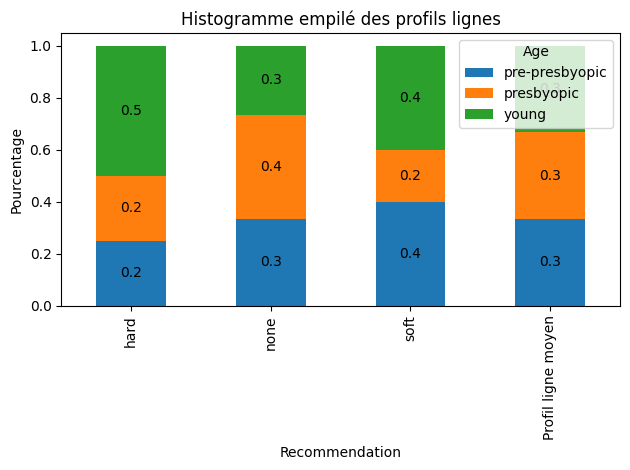

In [19]:
# Suppression de la colonne 'total' et de la ligne 'freq_marginale' si elles existent
df_profil_temp = df_profil.drop(columns=['Total'], errors='ignore')
# df_profil_temp = df_profil_temp[:-1]

# Tracé de l'histogramme empilé
ax = df_profil_temp.plot(kind='bar', stacked=True)

# Ajouter les valeurs sur chaque barre
for container in ax.containers:
    ax.bar_label(container, fmt='%.001f', label_type='center')

plt.title('Histogramme empilé des profils lignes')
plt.ylabel('Pourcentage')
plt.xlabel('Recommendation')
plt.legend(title='Age')
plt.tight_layout()

# Affichage de l'histogramme
plt.show()

Parmis ceux qui n'ont pas de recommendation, 30% sont des jeunes, 30% de pre-presbyopic et 40% de presbyopic.

### Profils colonnes

In [20]:
# Création d'un tableau de profils colonnes
df_colonne = df_eff.copy()

# Renommer les colonnes dans df_colonne
df_colonne = df_colonne.rename(columns={'Total': 'Profil colonne moyen'})

# Total de chaque colonne
total_colonne = df_colonne.loc['Total']

# Calcul de chaque profil ligne
df_colonne[['pre-presbyopic','presbyopic', 'young', 'Profil colonne moyen']] /= total_colonne

# Affichage du tableau des profils lignes
print(df_colonne)

Age             pre-presbyopic  presbyopic  young  Profil colonne moyen
Recommendation                                                         
hard                     0.125       0.125   0.25              0.166667
none                     0.625       0.750   0.50              0.625000
soft                     0.250       0.125   0.25              0.208333
Total                    1.000       1.000   1.00              1.000000


Ici, 62.5% de l'échantillon n'a pas de recommendation. Ces proportions montent à 75% chez les presbyopix et descend à 50% chez les jeunes.

### Histogramme des profils colonnes

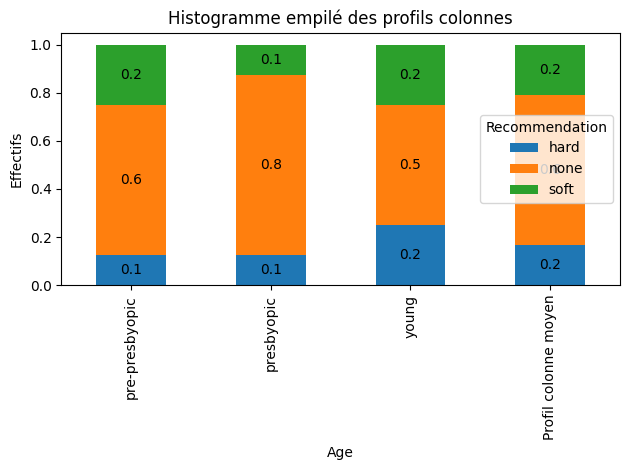

In [27]:
# Suppression de la colonne 'total' et de la ligne 'freq_marginale' si elles existent
# df_colonne_temp = df_colonne.drop(columns=['Profil colonne moyen'], errors='ignore')
df_colonne_temp = df_colonne[df_colonne.index != 'Total']

df_colonne_temp = df_colonne_temp.T

# Tracé de l'histogramme empilé
ax = df_colonne_temp.plot(kind='bar', stacked=True)

# Ajouter les valeurs sur chaque barre
for container in ax.containers:
    ax.bar_label(container, fmt='%.001f', label_type='center')
    
plt.title('Histogramme empilé des profils colonnes')
plt.ylabel('Effectifs')
plt.xlabel('Age')
plt.legend(title='Recommendation')
plt.tight_layout()

# Affichage de l'histogramme
plt.show()

Parmis les pre-presbyopic, 60% des individus n'ont pas de recommendation.

## Distance du Khi2
### Tableaux des effectifs observés vs théoriques

In [22]:
from scipy.stats import chi2_contingency as chi2_contingency

khi2, pval, ddl, contingent_theorique = chi2_contingency(df_eff[['pre-presbyopic','presbyopic', 'young']])

print("Tableau des effectifs observés :\n", df_eff)

# Création d'un tableau des effectifs théoriques
df_theorique = df_eff.copy()
df_theorique[['pre-presbyopic','presbyopic', 'young']] = contingent_theorique

print("\nTableau des effectifs théoriques :\n", df_theorique)

Tableau des effectifs observés :
 Age             pre-presbyopic  presbyopic  young  Total
Recommendation                                          
hard                         1           1      2      4
none                         5           6      4     15
soft                         2           1      2      5
Total                        8           8      8     24

Tableau des effectifs théoriques :
 Age             pre-presbyopic  presbyopic     young  Total
Recommendation                                             
hard                  1.333333    1.333333  1.333333      4
none                  5.000000    5.000000  5.000000     15
soft                  1.666667    1.666667  1.666667      5
Total                 8.000000    8.000000  8.000000     24


### Tableaux des fréquences observés vs théoriques

In [23]:
khi2_freq, pval_freq, ddl_freq, contingent_theorique_freq = chi2_contingency(df_freq[['pre-presbyopic','presbyopic', 'young']])

print("Tableau des fréquences observés :\n", df_freq)

# Création d'un tableau des effectifs théoriques
df_freq_theorique = df_freq.copy()
df_freq_theorique[['pre-presbyopic','presbyopic', 'young']] = contingent_theorique_freq

print("\nTableau des fréquences théoriques :\n", df_freq_theorique)

Tableau des fréquences observés :
 Age             pre-presbyopic  presbyopic     young     Total
Recommendation                                                
hard                  0.041667    0.041667  0.083333  0.166667
none                  0.208333    0.250000  0.166667  0.625000
soft                  0.083333    0.041667  0.083333  0.208333
Total                 0.333333    0.333333  0.333333  1.000000

Tableau des fréquences théoriques :
 Age             pre-presbyopic  presbyopic     young     Total
Recommendation                                                
hard                  0.055556    0.055556  0.055556  0.166667
none                  0.208333    0.208333  0.208333  0.625000
soft                  0.069444    0.069444  0.069444  0.208333
Total                 0.333333    0.333333  0.333333  1.000000


### Tableau des différences

In [24]:
# Copie du DataFrame original
df_diff = df_eff.copy()

n = len(df_diff)

# Calcul de la différence
df_diff['pre-presbyopic'][:n] = ((df_theorique['pre-presbyopic'][:n] - df_eff['pre-presbyopic'][:n]) ** 2) / df_theorique['pre-presbyopic'][:n]
df_diff['presbyopic'][:n] = ((df_theorique['presbyopic'][:n] - df_eff['presbyopic'][:n]) ** 2) / df_theorique['presbyopic'][:n]
df_diff['young'][:n] = ((df_theorique['young'][:n] - df_eff['young'][:n]) ** 2) / df_theorique['young'][:n]

print(df_diff)

Age             pre-presbyopic  presbyopic     young  Total
Recommendation                                             
hard                  0.083333    0.083333  0.333333      4
none                  0.000000    0.200000  0.200000     15
soft                  0.066667    0.266667  0.066667      5
Total                 0.000000    0.000000  0.000000     24


/tmp/ipykernel_7683/3513671975.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff['presbyopic'][:n] = ((df_theorique['presbyopic'][:n] - df_eff['presbyopic'][:n]) ** 2) / df_theorique['presbyopic'][:n]
/tmp/ipykernel_7683/3513671975.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff['young'][:n] = ((df_theorique['young'][:n] - df_eff['young'][:n]) ** 2) / df_theorique['young'][:n]


### Analyse du Khi2

In [25]:
def get_seuil(ddl):
    if ddl == 1:
        seuil = 3.84
    elif ddl == 2:
        seuil = 5.99
    elif ddl == 3:
        seuil = 7.82
    elif ddl == 4:
        seuil = 9.49
    elif ddl == 5:
        seuil = 11.07
    elif ddl == 6:
        seuil = 12.59
    elif ddl == 7:
        seuil = 14.07
    elif ddl == 8:
        seuil = 15.51
    elif ddl == 9:
        seuil = 16.92
    return seuil

seuil = get_seuil(ddl - 2) # On enlève 2 au ddl car ici il considère la ligne eff_ligne et la colonne eff_colonne

print("Khi2 =", khi2)
print("ddl =", ddl - 2)
print("Seuil =", seuil)

if (khi2 > seuil):
    print("\nLa distance du chi-deux est supérieure au seuil. On admet donc que les variables sont fortement liées. Ce qui confirme ce qui a été observé avec les profils lignes et colonnes.")
else:
    print("\nLa distance du chi-deux est inférieure au seuil. On peut dire que les variables sont indépendantes. Ce qui confirme ce qui a été observé avec les profils lignes et colonnes.")

Khi2 = 1.3
ddl = 4
Seuil = 9.49

La distance du chi-deux est inférieure au seuil. On peut dire que les variables sont indépendantes. Ce qui confirme ce qui a été observé avec les profils lignes et colonnes.


Attention, ici nous n'avons pas un effectif théorique > 5 pour chaque case du tableau. Les résultats de ce test ne peuvent donc pas être considérés.